<a href="https://colab.research.google.com/github/RaimoHaikari/AIDA/blob/main/JAMK_study_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study Project 1

Preface

This notebook contains my answer to Artificial Intelligence YTIP2100-3004 task #1.

All the text in this notebook is mine, but I have used ChatGPT to improve the clarity of the text. Whenever I have used code samples from the Internet, I’ll have added a link to the original source.

About the terminology used in this notebook:

*   dataframe columns are sometimes referred to as variables. This is mainly to keep text more fluent.

I’ll start by loading the packages I’m going to use.


In [ ]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd    # This is the standard way of importing the Pandas library
import numpy as np

import scipy as sp
import scipy.stats as stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report

import graphviz

Then I’ll read the material.

In [ ]:
csvUrl = "https://raw.githubusercontent.com/RaimoHaikari/paikkatieto/master/misc/players.csv"
df = pd.read_csv(csvUrl)

## Assignment 1.1: Statistics

To begin, I'll provide a brief preview of the material. We can achieve this by utilizing the ['head' property](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html), which allows us to print the initial rows of the dataframe.

In [ ]:
df.head(5)

,Player Name,Age,Height,Weight,Position,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions
0,Lionel Messi,34,170,72,Forward,30,15,87.5,60,20,10
1,Cristiano Ronaldo,36,187,83,Forward,25,10,82.3,55,15,5
2,Neymar Jr,29,175,68,Forward,20,20,88.2,50,18,12
3,Kylian Mbappe,22,178,73,Forward,29,12,85.6,52,22,10
4,Mohamed Salah,29,175,71,Forward,23,9,82.3,45,18,8


In addition to variable names and records, the output also includes index values. These index values are unique and serve as identifiers for individual records. Depending on the type of data, there are various ways to set up the index. For this particular instance, we are utilizing a Range Index.

The ['Index' property](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.index.html) enables us to access and display information related to the index.

In [ ]:
df.index

RangeIndex(start=0, stop=34, step=1)

The ['shape' property](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) returns a tuple indicating the number of rows and columns.

In [ ]:
df.shape

(34, 11)

There are 34 rows and 11 columns.

[isna()-function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) displays how many NA -values columns have.

In [ ]:
df.isna().sum()

Player Name        0
Age                0
Height             0
Weight             0
Position           0
Goals              0
Assists            0
Pass Accuracy      0
Shots on Target    0
Tackles            0
Interceptions      0
dtype: int64

No missing values are present.

The ['dtypes' property](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) provides information about data types.

In [ ]:
df.dtypes

Player Name         object
Age                  int64
Height               int64
Weight               int64
Position            object
Goals                int64
Assists              int64
Pass Accuracy      float64
Shots on Target      int64
Tackles              int64
Interceptions        int64
dtype: object

### Numeric variables

Most of the columns in the dataset contain integer values, except for the following columns:

- **Player Name**: This column has the data type 'object,' indicating it contains textual information, likely the names of the players.
- **Position**: Also of data type 'object,' this column describes the player's role within the team, providing contextual information.
- **Pass Accuracy**: This column contains float values, representing the percentage of successful passes made by each player.

The [describe()-function](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) displays basic statistic of the numeric variables.

In [ ]:
df.describe()

,Age,Height,Weight,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,29.500000,182.911765,78.264706,8.058824,5.852941,83.817647,19.382353,16.617647,11.000000
std,3.807887,6.859489,8.147537,9.679535,5.842023,6.089856,19.403240,11.409764,8.506682
min,22.000000,170.000000,64.000000,0.000000,0.000000,68.000000,0.000000,0.000000,0.000000
25%,27.000000,178.000000,71.250000,1.000000,0.250000,82.025000,2.750000,10.000000,5.000000
50%,29.500000,183.500000,78.000000,3.500000,4.500000,85.000000,13.000000,16.500000,10.000000
75%,32.500000,188.000000,84.750000,13.750000,10.000000,88.075000,33.750000,21.500000,15.000000
max,36.000000,196.000000,92.000000,30.000000,20.000000,91.800000,60.000000,41.000000,32.000000


The output provides valuable statistics for each variable:

- **count**: This represents the number of non-missing (non-Na) values within the variable
- **mean**: It is the average value of the variable
- **std**: The standard deviation measures the extent of variability in the data
- **min**: This is the minimum value observed in the column
- **25%**: This value signifies the 1st quartile, where 25% of the data points fall below this threshold
- **50%**: The median value, where half of the values are below and half are above this point
- **75%**: This represents the 3rd quartile, indicating that 75% of the data falls below this value
- **max**: The maximum value found in the column.

So for example:

- Both the median and mean ages of the players are 29.5 years
- The tallest player has a height of 196 cm
- The lightest player weighs only 60 kilograms
- The highest number of goals scored by a player is 30 goals.

### class variables

One way to get a preview of class variable is to use value_counts() -function, which returns :

- unique variable values
- number of occurrences of each of those values


In [ ]:
df['Position'].value_counts()

Forward       10
Midfielder     9
Defender       9
Goalkeeper     6
Name: Position, dtype: int64

We can observe that the most frequently occurring position is *forward*, with a total of 10 players in this category. Following closely, there are *9 midfielders* and *9 defenders*. *Goalkeepers* are the least common, with only 6 players specializing in this position.

While names might be the most intriguing aspect of this dataset, summarizing them in a meaningful way can be challenging. As a compromise, we can choose to display the unique values using Pandas' [unique() -function](https://pandas.pydata.org/docs/reference/api/pandas.unique.html), which provides a list of distinct names without duplicates.

In [ ]:
df['Player Name'].unique()

array(['Lionel Messi', 'Cristiano Ronaldo', 'Neymar Jr', 'Kylian Mbappe',
       'Mohamed Salah', 'Luka Modric', 'Andrew Robertson', 'Neymar Jr.',
       'Thiago Alcantara', 'Sergio Ramos', 'Ederson', 'Kalidou Koulibaly',
       'Toni Kroos', 'Kevin De Bruyne', 'Virgil van Dijk',
       'Karim Benzema', 'Bruno Fernandes', 'Joshua Kimmich',
       'Teemu Pukki', 'Glen Kamara', 'Joel Pohjanpalo', 'Lukas Hradecky',
       'Jere Uronen', 'Rasmus Schüller', 'Fredrik Jensen',
       'Niklas Moisander', 'Robin Lod', 'Jesse Joronen', 'Anssi Jaakkola',
       'Jussi Jääskeläinen', 'Niki Mäenpää', 'Paulus Arajuuri',
       "Daniel O'Shaughnessy", 'Leo Väisänen'], dtype=object)

## Assignment 1.2: Visualization (max. 4 points)

Graphs serve as a valuable tool for examining the distribution of variable values and understanding the relationships between variables. In the following section, I will provide examples of the most common types of graphs. While I won't delve into an in-depth analysis of each variable, my intention is to showcase the various graph types available for visualization.

We start with the age.

### Age

Let's explore the age distribution of players within each position. To do this, I'll categorize players into four distinct groups manually.

- 20 - 25
- 25 - 30
- 30 - 35
- 35 - 40

This classification can be achieved using the Pandas [cut()-function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), which allows us to segment a variable into predefined bins.

In [ ]:
df['Age Category'] = pd.cut(
	df['Age'],
	bins = [20,25,30,35,40],
	labels = ['20 - 24','25 - 29','30 - 34','35 - 39']
)

Categorical variables can be effectively visualized by harnessing the power of colors. For instance, in a scatter plot, observations belonging to the same category can be represented by using the same color, allowing us to easily distinguish and compare these groups. This visual technique can reveal valuable insights into group differences.

To begin, I will create a dictionary that associates a unique color with each player position. I will use the following color scheme:

- **Forward**: red
- **Midfielder**: green
- **Defender**: blue
- **Goalkeeper**:  orange

Next, I will introduce a new column in the players' dataframe. This column will store the corresponding color for each player's position.

In [ ]:
positonToColor = {'Forward': 'red', 'Midfielder': 'green', 'Defender': 'blue', 'Goalkeeper': 'orange'}
df['positionColor'] = df['Position'].map(positonToColor)

Now we are ready for a bar chart, which displays the number of players in each age group for each position.

As a starting point I used the Matplotlib library example [Grouped bar chart with labels](https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py).

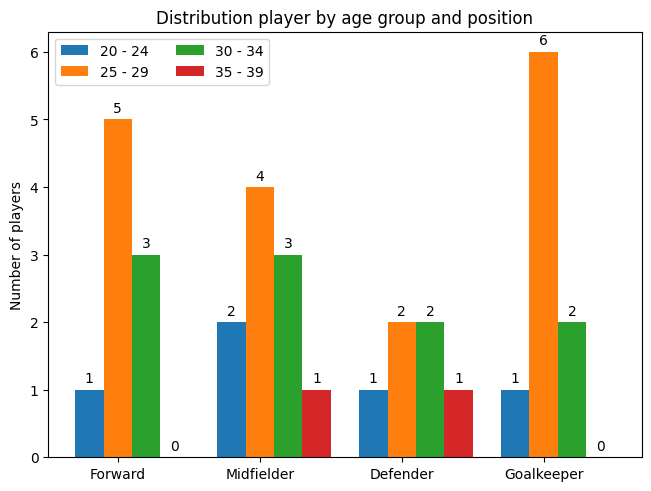

In [ ]:
df_AC_pivot = pd.pivot_table(df, values = 'Age', index=['Age Category'], columns = ['Position'], aggfunc = "count")

width = 0.2  # the width of the bars
multiplier = 0

x = np.arange(len(df['Position'].unique())) # the label locations

fig, ax = plt.subplots(layout='constrained')

for index, row in df_AC_pivot.iterrows():
  offset = width * multiplier
  rects = ax.bar(x + offset, row.values, width, label=index)
  ax.bar_label(rects, padding=3)
  multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of players')
ax.set_title('Distribution player by age group and position')
ax.set_xticks(x + width, df['Position'].unique())
ax.legend(loc='upper left', ncols=2)

plt.show();

Here are some key observations from the graph:

- The dataset is relatively small, which makes classification less meaningful and limits the discovery of interesting patterns
- In each position, the majority of players fall into the age group of 25-30.

### Weigth and height

Scatter plot offers a visual method to examine interactions between two variables.

So next I’ll introduce the scatter plot of weight and height. I’ll also add a regression line of those variables. The [polyfit()-function](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) of the Numpy package offers a way to fit that regression line.

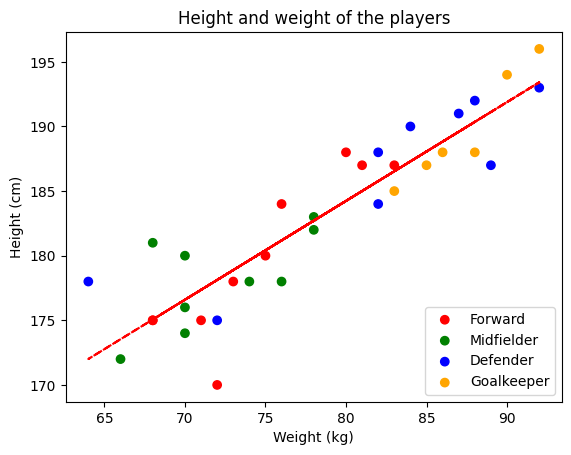

In [ ]:
fig = plt.figure()
ax = plt.axes()

positions = ['Forward', 'Midfielder', 'Defender', 'Goalkeeper']

# - add weiht and height observations
for p in positions:
  v = df.loc[df['Position'] == p]
  ax.scatter(v['Weight'], v['Height'], c = v['positionColor'])

# Finally add the regression line
# - obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(df['Weight'].values, df['Height'].values, 1)

# - use red as color for regression line
x = df['Weight'].values
ax.plot(x, m*x+b,  color = 'red', linestyle='dashed')

# ax.plot(x, (x + 54.85 / 1.85) * 2.54,  color = 'green', linestyle='dashed')

ax.set_title('Height and weight of the players')
ax.set_ylabel('Height (cm)')
ax.set_xlabel('Weight (kg)')

ax.legend(positions, loc='lower right')

plt.plot();

The graph reveals that:

- As expected, there is a positive correlation between height and weight, indicating that these two attributes tend to increase together.
- Goalkeepers and defenders generally exhibit larger physical profiles compared to forwards and midfielders.

The latter observation underscores the value of using graphs in data analysis. Discovering such an observation would have been more challenging through numerical analysis alone.

One should always try to find out explanations of their findings. So let's do that.

All the players included in this dataset are elite athletes. In defensive positions, those with greater reach may have a higher likelihood of reaching the top professional level compared to their smaller counterparts. In offensive positions, shorter players may possess the advantage of agility and speed when maneuvering the ball, potentially giving them an edge over taller but slightly less agile players.


In the bottom-left corner of the graph, there are a couple of players who stand out:

- one defender (indicated by a red dot) whose height doesn't align with his weight
- a midfielder and a defender whose weight doesn't correspond to their height.

It's important to note that these observations may be a result of the limited dimensions of the graph, because all the players in this dataset maintain athletic body compositions, as expected of top-tier athletes.


### Goals vs. shots

In another scatter plot, I will explore the relationship between Goals and Shots on Target.

In addition I will also add the following elements:

- A regression line depicting the relationship between these variables.
- 95% confidence limits associated with that regression line.

The code used to generate this graph is based on a solution originally found in a Stack Overflow question: [Show confidence limits and prediction limits in scatter plot](https://stackoverflow.com/questions/27164114/show-confidence-limits-and-prediction-limits-in-scatter-plot\)

To begin, I'll create a modified copy of the original dataset that excludes goalkeepers.

In [ ]:
fieldPlayers = df[df['Position'] != "Goalkeeper"]

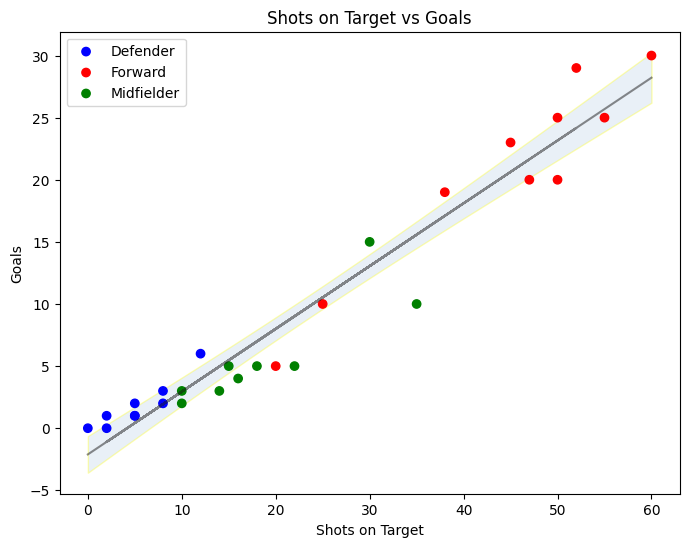

In [ ]:
def plot_ci_manual(t, s_err, n, x, x2, y2, ax=None):
  """Return an axes of confidence bands using a simple approach.

  Notes
  -----
  .. math:: \left| \: \hat{\mu}_{y|x0} - \mu_{y|x0} \: \right| \; \leq \; T_{n-2}^{.975} \; \hat{\sigma} \; \sqrt{\frac{1}{n}+\frac{(x_0-\bar{x})^2}{\sum_{i=1}^n{(x_i-\bar{x})^2}}}
  .. math:: \hat{\sigma} = \sqrt{\sum_{i=1}^n{\frac{(y_i-\hat{y})^2}{n-2}}}

  References
  ----------
  .. [1] M. Duarte.  "Curve fitting," Jupyter Notebook.
  http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/CurveFitting.ipynb

  """
  if ax is None:
    ax = plt.gca()

  ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
  ax.fill_between(x2, y2 + ci, y2 - ci, color="#b9cfe7", edgecolor="yellow", alpha=0.3)

  return ax

# Saa parametreinä regressiosuoran kertoimet ja x-akselin arvoja.
def equation(a, b):
    """Return a 1D polynomial."""
    return np.polyval(a, b)

# Raw Data
x = fieldPlayers['Shots on Target'].values
y = fieldPlayers['Goals'].values
col = fieldPlayers['positionColor'].values


p, cov = np.polyfit(x, y, 1, cov=True)    # parameters and covariance from of the fit of 1-D polynom.
                                          #  - p holds the m (slope) and b(intercept) of linear regression line
y_model = equation(p, x)                  #  - ~ build a model on based the coefficients

# Statistics
n = x.size                                # number of observations
m = p.size                                # number of parameters
dof = n - m                               # degrees of freedom
t = stats.t.ppf(0.975, n - m)             # t-statistic; used for CI and PI bands

# Estimates of Error in Data/Model
resid = y - y_model                       # residuals; diff. actual data from predicted values
chi2 = np.sum((resid / y_model)**2)       # chi-squared; estimates error in data
chi2_red = chi2 / dof                     # reduced chi-squared; measures goodness of fit
s_err = np.sqrt(np.sum(resid**2) / dof)   # standard deviation of the error


# Plotting --------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Fit
ax.plot(x, y_model, "-", color="0.1", linewidth=1.5, alpha=0.5)

x2 = np.linspace(np.min(x), np.max(x), 100)
y2 = equation(p, x2)

# Confidence Interval (select one)
plot_ci_manual(t, s_err, n, x, x2, y2, ax=ax)

# Data
# - in order to use legend with correct labels, I'll have to use
#   the original fielePlayers dataframe
for n, grp in fieldPlayers.groupby('Position'):
    ax.scatter(x = "Shots on Target", y = "Goals", data=grp, label=n, c ="positionColor")

ax.set_title('Shots on Target vs Goals')
ax.set_ylabel('Goals')
ax.set_xlabel('Shots on Target')

ax.legend()

plt.plot();

Implementing that graph turned out to be a more challenging task than I had initially anticipated. Nevertheless, I'm confident that the effort invested will ultimately prove to be worthwhile.

The graph doesn't unveil any particularly unique insights:

- The majority of goals are scored by forwards.
- Defenders score less frequently.

There is a correlation between the number of goals and the number of shots taken.

However, it's worth noting that the regression line doesn't seem to be an ideal fit for the dataset. Nearly half of the observations fall outside of the confidence limits, even though there don't appear to be any clear outliers.


### Pass Accuracy

Next I will generate a set of histograms to assess the distribution of passes made by players.

Since all players, including Goalkeepers, have value in this column, we can revert to using the original dataframe.

Additionally, I will incorporate a line representing the normal distribution on the graph. Normal distribution is computed based on the mean and standard deviation of pass accuracy values.

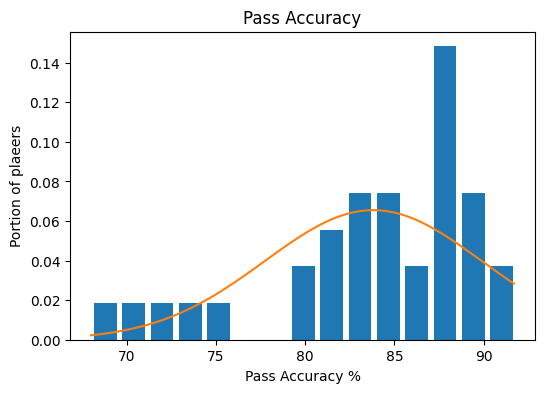

In [ ]:
num_bins = 15
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(df['Pass Accuracy'], bins = 15, rwidth = 0.8, density = True)

rng = np.arange(df['Pass Accuracy'].min(), df['Pass Accuracy'].max(), 0.1)

#rng = np.arange(df.Height.min(), df.Height.max(), 0.1)
ax.plot(
    rng,
    norm.pdf(rng, df['Pass Accuracy'].mean(), df['Pass Accuracy'].std())
)

ax.set_title('Pass Accuracy')
ax.set_ylabel('Portion of plaeers')
ax.set_xlabel('Pass Accuracy %')

plt.show()


In my opinion, histograms are typically better suited for larger datasets. Our data has only few records, so  there may be other graph types that are more suitable for assessing the quality of passes.

Nonetheless, histogram tells us that:

- despite these are all top players, there are some players who definitely should improve their act. In the left corner you can see a distinct group of players, that were performing below the majority of players
- the tallest bar in the histogram represents players with nearly 90% pass accuracy.
- histogram follows normal distribution rather well, maybe there are more of those players who had high accuracy value than normal distribution would predict. But that also makes sense, because this set represents elite players.

To gain further insights, let's categorize players by their positions; this approach may reveal additional patterns in pass accuracy.


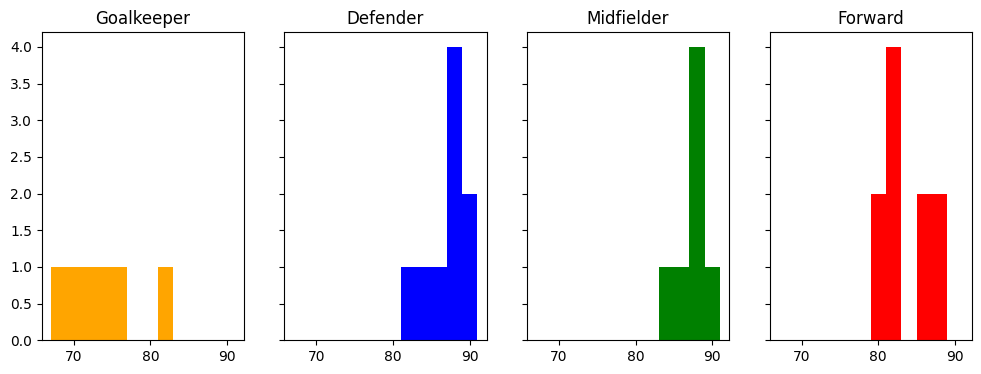

In [ ]:
x1 = df.loc[df['Position'] == "Forward"]['Pass Accuracy'].values
x2 = df.loc[df['Position'] == "Midfielder"]['Pass Accuracy'].values
x3 = df.loc[df['Position'] == "Defender"]['Pass Accuracy'].values
x4 = df.loc[df['Position'] == "Goalkeeper"]['Pass Accuracy'].values

kwargs = dict(bins = np.arange(start = 67, stop = 93, step = 2), density = False)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12, 4), sharey='row')

ax1.hist(x4, color = positonToColor['Goalkeeper'], **kwargs)
ax1.title.set_text('Goalkeeper')

ax2.hist(x3, color = positonToColor['Defender'], **kwargs)
ax2.title.set_text('Defender')

ax3.hist(x2, color = positonToColor['Midfielder'], **kwargs)
ax3.title.set_text('Midfielder')

ax4.hist(x1, color = positonToColor['Forward'], **kwargs)
ax4.title.set_text('Forward')

plt.plot();

Grouped histograms reveal that Goalkeepers tend to have the lowest pass accuracy values. And that makes sense, because goalkeepers often shoot long opening passes.

As passes become longer, there is an increased risk of the opposing team intercepting the ball.

## Assignment 1.3: Grouping (max. 4 points)

There are at least two ways you can group a Dataframe - that is by [groupby()-method](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) and by [pivot_table()-method](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html).

I like to use the pivot_table()-method, because it is similar to what one uses in spreadsheets.

So I'll start by grouping data by position and aggregating median values to all of the numeric variables.

In [ ]:
_aggGunc = {
    'Age': 'median',
    'Height': 'median',
    'Weight': 'median',
    'Goals': 'median',
    'Assists': 'median',
    'Pass Accuracy': 'median',
    'Shots on Target': 'median',
    'Tackles': 'median',
    'Interceptions': 'median'
}

pd.pivot_table(
    df,
    index=['Position'],
    aggfunc = _aggGunc
)

,Age,Assists,Goals,Height,Interceptions,Pass Accuracy,Shots on Target,Tackles,Weight
Position,,,,,,,,,
Defender,30.0,1,1.0,188,15.0,87.9,5.0,20,84
Forward,29.0,10,21.5,179,6.5,82.3,48.5,15,74
Goalkeeper,29.5,0,0.0,188,0.0,72.5,0.0,0,87
Midfielder,30.0,8,5.0,178,14.0,88.1,16.0,20,70


Key insights from the results include::

- regardless of their position, median age of the plaers is about 30 years
- values in Assists column are highly polarized. The majority of assisting passes being attributed to forwards or midfielders.
- it is no surprise that forwards have the highest value in the Goals column
- as previously noted, defensive players tend to have larger physical profiles than their offensive counterparts
- Defenders and midfielders excel in interceptions and tackles.
- Goalkeepers display the lowest Pass Accuracy values.
- Forwars have lesser Pass Accuracy values than Defenders and Midfielders, which makes sense because they operate on so called target area, which is always crowded with aggressive opponent plaers.
- majority of shots on target area are done by forwarders.

BoxPlots offers a nice way to study variable distributions.

In BoxPlot:

- lower end of the box represents the 1st quartile limit
- green line in the middle of the box tells the median value
- The upper end of the box represents the 3rd quartile limit.

On both ends of the box there is a vertical bar attached to horizontal whiskers. If there are dots outside of those whiskers, those dots represent outliers.

There are many ways you can produce boxplot. This time I am going to use Pandas library method, which allows simultaneously group the data and display boxplots.

First I'll introduce helper function, that allows me to choose which column is used in plotting.

In [ ]:
def printGroupedBoxplot(colName):
  fig = plt.figure()
  ax = plt.axes()

  df.boxplot(column=[colName], by='Position', ax=ax)

  plt.plot()

### Age

I'll start by plotting grouped age boxplots.

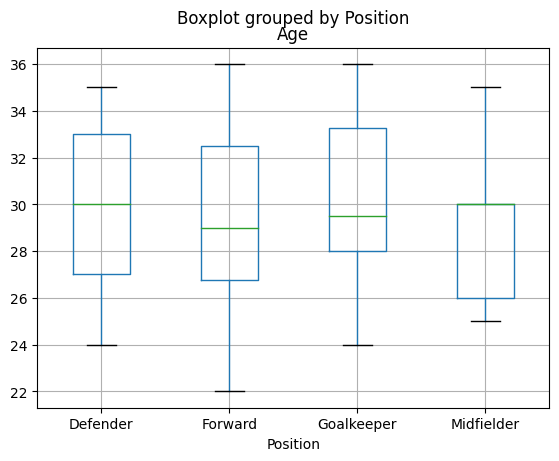

In [ ]:
printGroupedBoxplot('Age')

Age distribution of midfielders looks different than others.

- it looks like there is no 3rd quartile limit at all
- upper outlier limit is much taller that in other groups

I'll take a closer look at midfielders age distribution by using histogram and I will also compare midfielders with defenders, who seem to have the same mean age.

[]

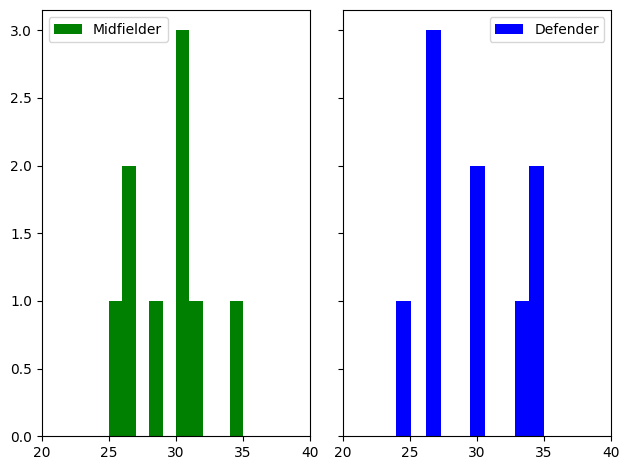

In [ ]:
x1 = df.loc[df['Position'] == 'Midfielder',['Age']].values
x2 = df.loc[df['Position'] == 'Defender',['Age']].values

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(x1, label='Midfielder', color = positonToColor['Midfielder'])
axs[0].set_xlim([20, 40])
axs[0].legend(loc="upper left")

axs[1].hist(x2, label='Defender', color = positonToColor['Defender'])
axs[1].set_xlim([20, 40])
axs[1].legend(loc="upper right")

plt.plot()

There isn't a very significant difference between midfielders and defenders.
but because dataset is so small, couple older players in defenders group makes distrubtion look more balanced.

### Interceptions

How about interceptions. What will grouped boxplots reveal us?

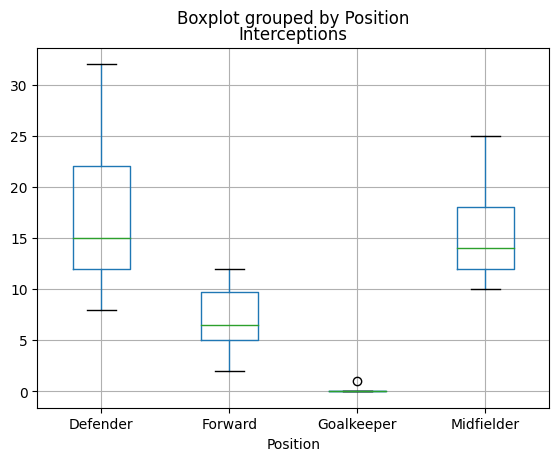

In [ ]:
printGroupedBoxplot('Interceptions')

- As we already noticed, defenders and midfielders excel in interceptions.
- In goalkeeper column you can notice one outlier player, otherwise goalkeepers haven't made any interceptions.

If we print Goalkeepers, we can confirm that only one goalkeeper has made interception.

In [ ]:
df[df['Position'] == "Goalkeeper"]

,Player Name,Age,Height,Weight,Position,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions,Age Category,positionColor
10,Ederson,28,188,86,Goalkeeper,0,1,82.6,0,2,1,25 - 29,orange
21,Lukas Hradecky,31,187,85,Goalkeeper,0,0,70.0,0,0,0,30 - 34,orange
27,Jesse Joronen,28,196,92,Goalkeeper,0,0,75.0,0,0,0,25 - 29,orange
28,Anssi Jaakkola,34,194,90,Goalkeeper,0,0,72.0,0,0,0,30 - 34,orange
29,Jussi Jääskeläinen,24,185,83,Goalkeeper,0,0,68.0,0,0,0,20 - 24,orange
30,Niki Mäenpää,36,188,88,Goalkeeper,0,0,73.0,0,0,0,35 - 39,orange


Output reveals that it is **Ederson**.

He is also the only goalkeeper, who had tackled and assisted a goal and his pass accuracy value is superior when compared with other goalkeepers.


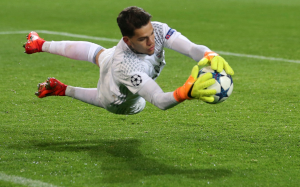

In the Defenders box plot the upper whisker is quite tall, which implies that there is at least one defender with very high value in this column.

Let's find out who he is.

In [ ]:
ehtoA = df['Position'] == 'Defender'
ehtoB = df['Interceptions']  == df.loc[df['Position'] == 'Defender','Interceptions'].max()

masterInterceptor = df.loc[ehtoA & ehtoB]
masterInterceptor

,Player Name,Age,Height,Weight,Position,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions,Age Category,positionColor
9,Sergio Ramos,35,184,82,Defender,6,2,89.5,12,40,32,30 - 34,blue


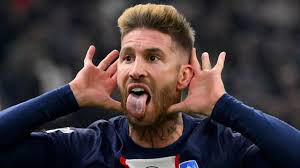

The player in question is **Sergio Ramos**!

If we look at his stats, we can observe that his Pass Accuracy and Tackles values appear to be quite impressive.

We can confirm this by generating histograms ofor these values. I'll also include vertical lines to both histograms to highlight Sergio's values.

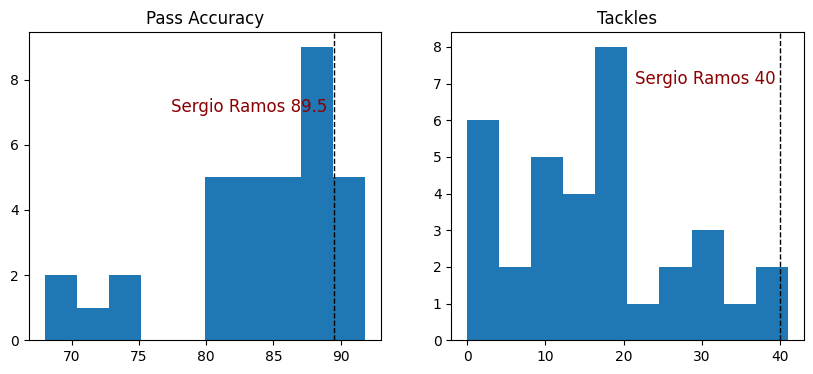

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

min_ylim, max_ylim = plt.ylim()

srPAcc = masterInterceptor['Pass Accuracy'].values[0]
srTcls = masterInterceptor['Tackles'].values[0]

ax1.hist(df['Pass Accuracy'].values, bins = 10)
ax1.axvline(srPAcc, color='k', linestyle='dashed', linewidth=1)
ax1.text(srPAcc - 0.5, 7, f'Sergio Ramos {srPAcc}', color = "#8b0000",  fontsize= 12, horizontalalignment='right')
ax1.title.set_text('Pass Accuracy')

ax2.hist(df['Tackles'].values, bins = 10)
ax2.axvline(srTcls, color='k', linestyle='dashed', linewidth=1)
ax2.text(srTcls - 0.5, 7, f'Sergio Ramos {srTcls}', color = "#8b0000",  fontsize= 12, horizontalalignment='right')
ax2.title.set_text('Tackles')

Despite any contrary claims, statistics always tell the truth.

Sergio belongs to the top elite in both categories.

## Assignment 1.4: Correlations (max. 4 points)

Correlation reveals the simultaneous behavior of variables:

- When correlation is positive, the values of both variables increase simultaneously.
- When correlation is negative, as one variable's values increase, the values of the other variable decrease.
- When the correlation between two variables is near zero, it means that there is little to no linear relationship or association between those variables. Changes in one variable do not affect to other variable.

Correlation indicates either a similar or opposite behavior, but it does not imply a causal connection between variables.

A well-known example is that the reported number of [UFO sightings increases during economic downturns](https://www.bbc.com/future/article/20230726-the-weird-incidents-piquing-nasas-interest). However, this does not mean that UFOs (or their passengers) are responsible for economic disruptions.

The easiest way to calculate and visualize correlations between variables within a DataFrame is by using the Pandas [corr().method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html).

As a parameter for the function, you can specify the method used for calculating correlation. I'll stick with the default method, which is [Pearson's correlation coefficient](https://www.youtube.com/watch?v=xZ_z8KWkhXE).

Let's collect the names of numerical variables into a separate variable and calculate and visualize the correlations between these variables.

In [ ]:
numericVars = ['Age','Height','Weight','Goals','Assists','Pass Accuracy','Shots on Target','Tackles','Interceptions']

corr_mat = df[numericVars].corr().round(2)
corr_mat.style.format(precision=2).background_gradient(cmap='coolwarm', axis=None)

,Age,Height,Weight,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions
Age,1.00,0.09,0.18,0.06,-0.01,0.03,0.09,0.08,0.04
Height,0.09,1.00,0.91,-0.48,-0.73,-0.41,-0.53,-0.39,-0.33
Weight,0.18,0.91,1.00,-0.41,-0.76,-0.45,-0.50,-0.42,-0.35
Goals,0.06,-0.48,-0.41,1.00,0.73,0.17,0.97,0.12,-0.09
Assists,-0.01,-0.73,-0.76,0.73,1.00,0.42,0.81,0.35,0.19
Pass Accuracy,0.03,-0.41,-0.45,0.17,0.42,1.00,0.25,0.79,0.75
Shots on Target,0.09,-0.53,-0.50,0.97,0.81,0.25,1.00,0.17,-0.05
Tackles,0.08,-0.39,-0.42,0.12,0.35,0.79,0.17,1.00,0.92
Interceptions,0.04,-0.33,-0.35,-0.09,0.19,0.75,-0.05,0.92,1.00


Inspection of correlation table reveals that:


- **Age**: exhibits no significant correlation with other variables
- **Height**: has positive correlation with weight and negative correlation with Assists
- **Weight**: has positive correlation with height and negative correlation with Assists (which makes sense)
- **Goals**: has positive correlation with Assists and Shots on Target
- **Assists**: has a positive correlation with Goals and Shots on Target. Assists also has negative correlation with Height and Weight
- **Pass Accuracy**: has positive correlation with Tackles and Interceptions
- **Shots on Target**: has positive correlation with Assists and Goals
- **Tackles**: has positive correlation with Pass Accuracy and Interceptions
- **Interceptions**: shows a positive correlation with Pass Accuracy and Tackles


Correlations can be visualized by means of scatter plots.

To keep plot more readable, i'll select a subset of variables from the dataset: 'Goals,' 'Tackles,' 'Interceptions.'

Then I will create a [PairPlot](https://stackoverflow.com/questions/63416894/correlation-values-in-pairplot) of these variables, where:

- on the diagonal axis, one can see the distribution of variable values
- in the lower triangle, there are scatter plots of variable interactions
- upper triangle displays correlation values

[]

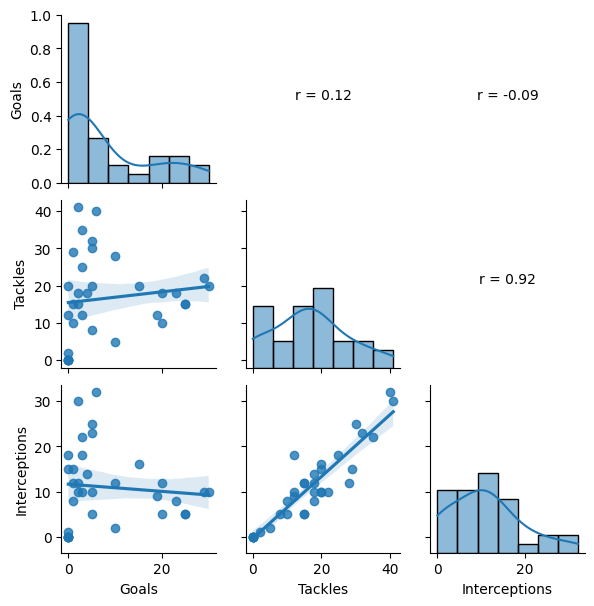

In [ ]:
from scipy.stats import pearsonr

def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

performaceVars = ['Goals','Tackles','Interceptions']
#performaceVars = ['Shots on Target','Tackles','Interceptions']

g = sns.PairGrid(df[performaceVars])
g.map_diag(sns.histplot, kde=True)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

g.fig.set_size_inches(6,6)

plt.plot()

I intentionally selected these variables to illustrate the contrasting appearances of correlated and uncorrelated variables:

- As indicated by correlation coefficient 0.92, there exists a strong positive correlation between Tackles and Interceptions.
This strong correlation is visually evident in the scatter plot, where all data points align neatly along the diagonal line.

- Whereas Interceptions and Goals don't have correlation.
Correlation coefficient of 0.12 is close to zero and scatter plot appears relatively random.

### Outliers

The [IQR technique](https://www.youtube.com/watch?v=A3gClkblXK8) is a well-established method for identifying outliers.

Here's a concise overview of the process:

Begin by subtracting the 1st quartile value from the 3rd quartile value to calculate the Interquartile Range (IQR), represented as IQR = Q3 - Q1.

Next, determine the upper and lower limits:

- Lower Limit = Q1 - 1.5 * IQR
- Upper Limit = Q3 + 1.5 * IQR

Any observations that fall above the upper limit or below the lower limit are considered outliers.

Now, let's proceed to demonstrate this process in practice. I will start by calculating the outlier limits and saving the results to the dataframe.


In [ ]:
def getLowerAndUpperLimit(serie):

  Q1 = serie.quantile(.25)
  Q3 = serie.quantile(.75)

  IQR = Q3 - Q1

  return (Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)


dfOutlierBounds = df[numericVars].apply(lambda x: getLowerAndUpperLimit(x),axis=0)

newIndex = pd.Series(['lower', 'upper'])
dfOutlierBounds.set_index([newIndex], inplace=True)
dfOutlierBounds


,Age,Height,Weight,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions
lower,18.75,163.0,51.0,-18.125,-14.375,72.95,-43.75,-7.25,-10.0
upper,40.75,203.0,105.0,32.875,24.625,97.15,80.25,38.75,30.0


Subsequently, I will iterate through the numeric variables, and if any outliers are detected, I will print both the variable name and the count of outliers

In [ ]:
for col in dfOutlierBounds.columns:

  lower = dfOutlierBounds.loc['lower',col]
  upper = dfOutlierBounds.loc['upper',col]

  areUnder = sum(df[col] < lower)
  areOver = sum(df[col] > upper)

  if areUnder > 0:
    print(f'- {col} {areUnder} observations are under lower limit')

  if areOver > 0:
    print(f'- {col} {areOver} observations are over upper limit')

- Pass Accuracy 3 observations are under lower limit
- Tackles 2 observations are over upper limit
- Interceptions 1 observations are over upper limit


Let's generate boxplots for the variables that contain outliers. Outliers are visually represented by dots located either above or below the whiskers.

[]

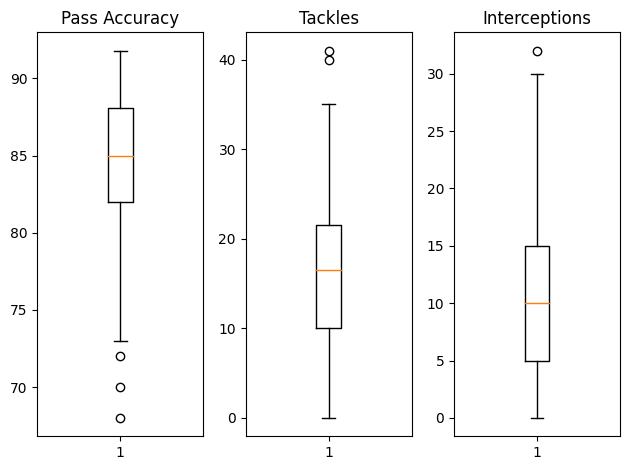

In [ ]:
# df.boxplot(column=['Tackles','Interceptions','Pass Accuracy'])

fig, axs = plt.subplots(1, 3, tight_layout=True)

axs[0].boxplot(df['Pass Accuracy'].values)
axs[0].title.set_text('Pass Accuracy')

axs[1].boxplot(df['Tackles'].values)
axs[1].title.set_text('Tackles')

axs[2].boxplot(df['Interceptions'].values)
axs[2].title.set_text('Interceptions')

plt.plot()

#### Pass Accuracy

And of course we wan't to know who those exceptional players were.

First Pass Accuracy:

In [ ]:
ehto = df['Pass Accuracy'] < dfOutlierBounds.loc['lower','Pass Accuracy']
df.loc[ehto]

,Player Name,Age,Height,Weight,Position,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions,Age Category,positionColor
21,Lukas Hradecky,31,187,85,Goalkeeper,0,0,70.0,0,0,0,30 - 34,orange
28,Anssi Jaakkola,34,194,90,Goalkeeper,0,0,72.0,0,0,0,30 - 34,orange
29,Jussi Jääskeläinen,24,185,83,Goalkeeper,0,0,68.0,0,0,0,20 - 24,orange


#### Tackles

Then tackes.

In [ ]:
ehto = df['Tackles'] > dfOutlierBounds.loc['upper','Tackles']
df.loc[ehto]

,Player Name,Age,Height,Weight,Position,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions,Age Category,positionColor
6,Andrew Robertson,27,178,64,Defender,2,6,87.9,5,41,30,25 - 29,blue
9,Sergio Ramos,35,184,82,Defender,6,2,89.5,12,40,32,30 - 34,blue


#### Interceptions

And finally Interceptions

In [ ]:
ehto = df['Interceptions'] > dfOutlierBounds.loc['upper','Interceptions']
df.loc[ehto]

,Player Name,Age,Height,Weight,Position,Goals,Assists,Pass Accuracy,Shots on Target,Tackles,Interceptions,Age Category,positionColor
9,Sergio Ramos,35,184,82,Defender,6,2,89.5,12,40,32,30 - 34,blue


## Assignment 1.5: Modeling (max. 4 points)

Typically, you would require a larger dataset before attempting to build a model. However, in this case, the primary objective is to demonstrate a fundamental understanding of model construction, so the limitations of our data are not a major concern.

Without delay, I will proceed to configure a [decision tree model](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) that leverages numeric variables to predict players' positions.

To begin, I will segregate the source and target variables.

In [ ]:
# Prepare the data
#X = df[['Height', 'Weight', 'Goals', 'Assists', 'Pass', 'Accuracy', 'Shots on Target', 'Tackles', 'Interceptions']]  # Features
# y = df['Position']  # Target variable

featureNames = ['Goals', 'Assists', 'Pass Accuracy','Shots on Target', 'Tackles', 'Interceptions']
X = df[featureNames] # Features
y = df['Position']  # Target variable

Then I'll split the data to test and training set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0)

This method operates recursively and involves the following steps:

- The algorithm traverses through all the columns in the dataset.-
- For each column, it calculates an entropy (or information gain) value.
- The column with the smallest entropy value (highest information gain) is selected.
- The data is partitioned based on the chosen column.
- Subsequently, the algorithm recursively applies these steps to the subsets, seeking the column with the lowest entropy value."

So, let's establish the decision tree! The 'max_depth' parameter determines the depth of recursion. I've chosen a value of 2, which means that the model will be relatively generalized and we don't need to worry about overfitting.

In [ ]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

After model is trained, we can visualize it.

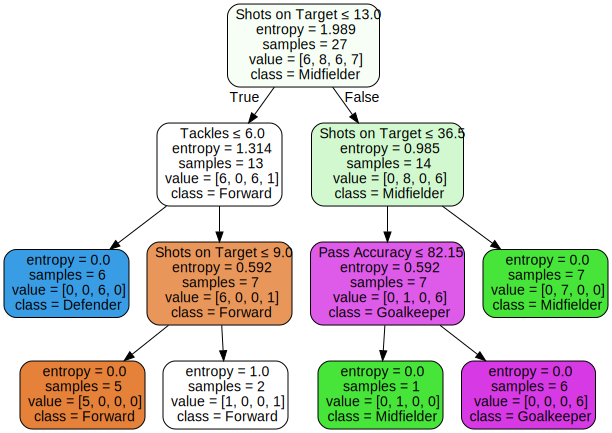

In [ ]:
dot_data = tree.export_graphviz(
    dt,
    out_file=None,
    feature_names=featureNames,
    class_names=y.unique().astype(str),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

Broadly speaking, the nodes in the graph can be categorized into two types: parent nodes and leaves.

Parent Nodes:

- Parent nodes are pivotal in the decision-making process. The first line within a parent node delineates the criterion used to partition the remaining data into two distinct groups.

Positioned at the base of each parent node are two arrows, each with a specific purpose:
- The arrow on the left segregates rows that satisfy the given test.
- Conversely, the arrow on the right isolates rows that do not meet the specified criteria.

Leaves signify the ultimate outcomes, where all nodes within a leaf belong to the same group.

For instance, if you examine the brown leaf located in the lower-left section of the graph:

- This leaf encompasses data on 5 players.

Specifically, these players:
- Recorded a Shots on Target value less than or equal to 13.
- Demonstrated a Tackles value greater than 6.0.
- Additionally, they maintained a Shots on Target value less than or equal to 9.0.


The visualization also highlights certain challenges within our model. For instance, consider the second leaf in the bottom row. It represents two distinct players, one being a forward and the other a goalkeeper. The principle underlying leaves suggests that all records within a leaf should belong to the same class. Addressing this issue could involve increasing the depth of the model; however, this approach may risk overfitting. Consequently, I have chosen to maintain the current model structure.

### Feature importance

By using the 'feature_importances_' attribute, we can determine the variable weights in terms of the model's importance.

We'll use code borrowed from the [Decision Tree Algorithm in Machine Learning Python – Predicting Churn Example](https://www.youtube.com/watch?v=sFVxFCYiIQI&t=0s) guide to print the weights

In [ ]:
if 'final_fi' in locals():
  del final_fi

# Calculating FI
for i, column in enumerate(featureNames):
    # print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))

    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})

    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi

# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()
final_fi

,index,Variable,Feature Importance Score
0,3,Shots on Target,0.669583
1,4,Tackles,0.250323
2,2,Pass Accuracy,0.080094
3,0,Goals,0.000000
4,1,Assists,0.000000
5,5,Interceptions,0.000000


Shots on Target is the most important variable in this model.

Let's test our model with unseen data.

In [ ]:
# Make predictions on the test set
y_pred = dt.predict(X_test)

The sklearn package includes method called [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), which generates essential metrics for classification.


For the first four  meters, unique values exist for each class in the test set.

- **Precision**: This metric measures the porpotion of successfull predictions where prediction matches the actual class.
- **Recall**: also known as "sensitivity", tells the proportion of actual positive cases that model correctly identified.
- **F1-score**: combination of precision and recall values
- **Support**: represents the number of items per class

Last three meters evaluatethe the test set as a whole.

- **Accuracy**: porpotion of successfull predictions
- **Macro avg**: average values of precision, recall and f1-scores
- **Weighted avg**: the weighted average values of precision, recall and f1-scores. It's is important to note that this metric is
often less informative, especially when dealing with imbalnced datasets, as classes with more instances tend to have higher accuracy.

In [ ]:
# Evaluate the model
# X_train, X_test, y_train, y_test
# Evaluate the model
report = classification_report(y_pred, y_test)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

    Defender       1.00      0.75      0.86         4
     Forward       1.00      1.00      1.00         2
  Midfielder       0.50      1.00      0.67         1

    accuracy                           0.86         7
   macro avg       0.83      0.92      0.84         7
weighted avg       0.93      0.86      0.87         7



If you examine the report closely, you'll observe that Goalkeepers are not included. This omission is due to the limited size of the dataset.

In scenarios like these, it's possible that there may not be a sufficient number of cases available for both the training and test sets.

That's all folks!

Thank you for reading and I am looking forward to hear your comments.